In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report, precision_score,recall_score 
from sklearn.linear_model import LogisticRegression

### Data Ingestion and Understanding the data

In [2]:
df = pd.read_csv("dataset2.csv")
df_pred = pd.read_csv("dataset2_pred.csv")

In [3]:
df.head()

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
4,0.77,0.15,15.0,True


In [4]:
df.shape

(1995, 4)

In [5]:
df.columns

Index(['1', '2', '3', 'Target'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1992 non-null   float64
 1   2       1992 non-null   float64
 2   3       1993 non-null   float64
 3   Target  1984 non-null   object 
dtypes: float64(3), object(1)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

1          3
2          3
3          2
Target    11
dtype: int64

In [8]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print()

1
0.43      143
0.40      142
0.71      142
0.60      138
0.57      137
0.63      135
0.80      134
0.69      134
0.46      133
0.49      131
0.74      129
0.66      127
0.51      125
0.77      120
0.54      117
540.00      1
600.00      1
7.00        1
60.00       1
570.00      1
Name: 1, dtype: int64

2
0.17       147
0.14       141
0.10       137
0.19       136
0.21       136
0.31       135
0.12       135
0.28       134
0.24       133
0.22       131
0.33       127
0.26       126
0.35       125
0.15       122
0.30       121
120.00       2
2600.00      1
28.00        1
19.00        1
140.00       1
Name: 2, dtype: int64

3
15.0      152
12.0      147
16.0      145
14.0      145
19.0      145
10.0      145
9.0       145
11.0      144
17.0      142
22.0      141
18.0      140
13.0      140
20.0      131
21.0      128
0.0         2
1900.0      1
Name: 3, dtype: int64

Target
False    1563
True      421
Name: Target, dtype: int64



In [10]:
for i in list(df.columns):
    n = df[i].unique()
    if len(n)<10:
        print(i)
        print(n)
    else:
        print(i + ': ' +str(len(n)) + ' unique values')

1: 21 unique values
2: 21 unique values
3: 17 unique values
Target
[False True nan]


In [11]:
skewness = pd.concat([
    df.select_dtypes(['float64' , 'int64']).describe(),
    pd.DataFrame(df.select_dtypes(['float64' , 'int64']).skew() , columns = ['skew']).T
] , axis = 0)

skewness

,1,2,3
count,1992.000000,1992.000000,1993.000000
mean,1.488800,1.741546,16.333166
std,22.145983,58.456685,42.407440
min,0.400000,0.100000,0.000000
25%,0.490000,0.150000,12.000000
50%,0.600000,0.220000,15.000000
75%,0.710000,0.300000,19.000000
max,600.000000,2600.000000,1900.000000
skew,25.667663,44.162862,44.037902


In [15]:
df.describe(include='all')

,1,2,3,Target
count,1992.000000,1992.000000,1993.000000,1984
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,1563
mean,1.488800,1.741546,16.333166,NaN
std,22.145983,58.456685,42.407440,NaN
min,0.400000,0.100000,0.000000,NaN
25%,0.490000,0.150000,12.000000,NaN
50%,0.600000,0.220000,15.000000,NaN
75%,0.710000,0.300000,19.000000,NaN


In [22]:
df = df.dropna()
df = df.reset_index(drop=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1977 non-null   float64
 1   2       1977 non-null   float64
 2   3       1977 non-null   float64
 3   Target  1977 non-null   object 
dtypes: float64(3), object(1)
memory usage: 61.9+ KB


### Data Visualization

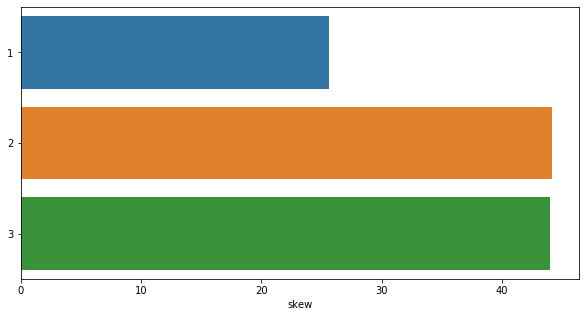

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(y = skewness.loc['skew' , : ].sort_values().index , x = skewness.loc['skew' , : ].sort_values() , orient='h')
plt.show()

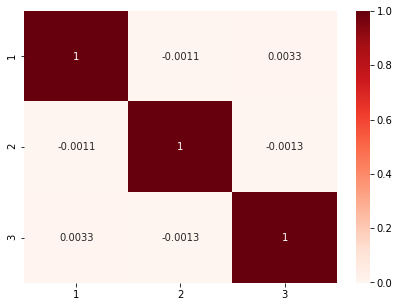

In [28]:
plt.figure(figsize=(7,5))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

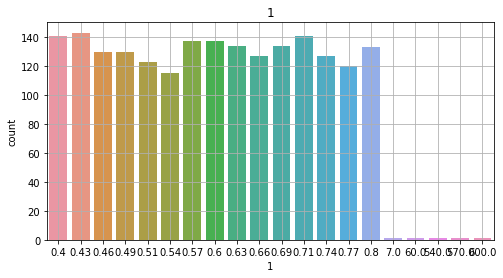

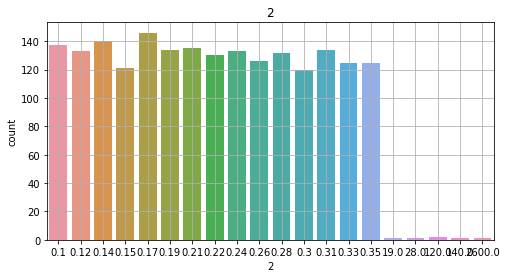

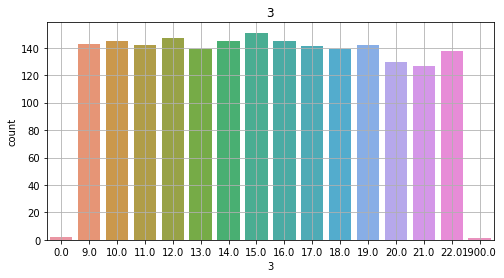

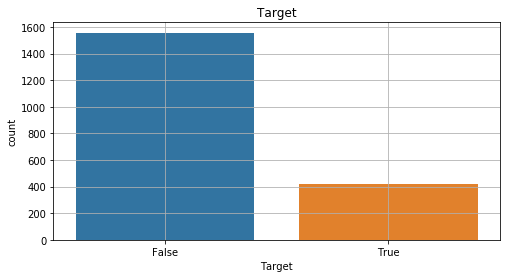

In [30]:
for i in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=i, data=df)
    plt.title(i)
    plt.grid()

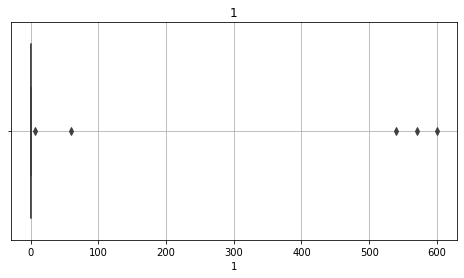

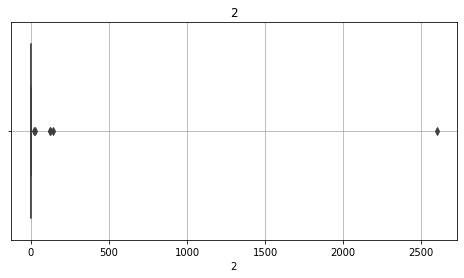

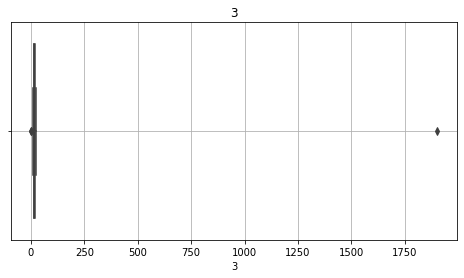

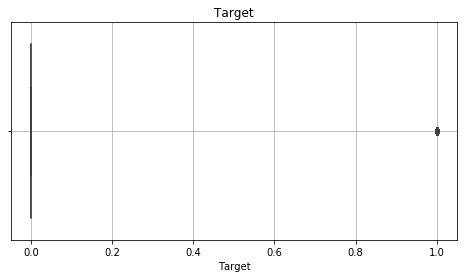

In [31]:
for i in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.grid()

In [45]:
label_encoder = LabelEncoder() 
print(df['Target'].unique())
df['Target']= label_encoder.fit_transform(df['Target'])
print(df['Target'].unique())

[False True]
[0 1]


### Model Building

In [46]:
X = df.drop("Target",axis = 1)
Y = df["Target"]

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [48]:
X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)
model = sm.Logit(Y_train,X_train_c).fit()
model.summary()

C:\Users\Aravind\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.310098
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 1383
Model:                          Logit   Df Residuals:                     1379
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:                  0.4039
Time:                        14:54:22   Log-Likelihood:                -428.87
converged:                       True   LL-Null:                       -719.41
Covariance Type:            nonrobust   LLR p-value:                1.263e-125
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5568      0.575     14.892      0.000       7.431       9.683
1             -0.0014      0.009     -0.153      0.878      -0.019       0.017
2            -11.4664      1.226     -9.351      0.000     -13.870      -9.063
3             -0.5522      0.035    -15.612      0.000      -0.621      -0.483
==============================================================================
"""

In [49]:
y_prob = model.predict(X_test_c)
y_prob.head()

1827    0.000626
1889    0.160496
678     0.450775
351     0.025210
1105    0.552278
dtype: float64

In [50]:
y_test = pd.DataFrame(Y_test)
y_test['prob'] = y_prob

In [51]:
y_test['y_pred'] = y_test['prob'].apply(lambda x:1 if x>=0.1 else 0)
y_test.head()

,Target,prob,y_pred
1827,0,0.000626,0
1889,0,0.160496,1
678,1,0.450775,1
351,0,0.025210,0
1105,1,0.552278,1


In [53]:
cm = confusion_matrix(y_test['Target'],y_test['y_pred'])
cm

array([[308, 163],
       [  7, 116]], dtype=int64)

In [55]:
fpr,tpr,threshold = roc_curve(y_test['Target'],y_test['prob']) 

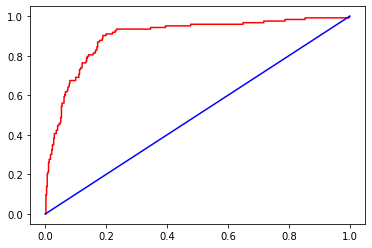

In [56]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')
plt.show()

In [58]:
roc_auc_score(y_test['Target'],y_test['prob'])

0.8975627017416671

In [62]:
print('Precison Score:',precision_score(y_test['Target'],y_test['y_pred']))
print('Recall Score or True Positive Rate : ',recall_score(y_test['Target'], y_test['y_pred']))

Precison Score: 0.4157706093189964
Recall Score or True Positive Rate :  0.943089430894309


In [73]:
df_pred_c = sm.add_constant(df_pred)
pred = list(model.predict(df_pred_c))
LR_pred = pd.DataFrame(pred,columns=['Target'])
LR_pred.head()

C:\Users\Aravind\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


,Target
0,0.002473
1,0.290283
2,0.294561
3,0.036229
4,0.002371


In [74]:
df_pred.shape

(855, 3)

In [75]:
LR_pred.shape

(855, 1)

In [76]:
prediction_final = pd.concat([df_pred,LR_pred], axis=1)

In [81]:
prediction_final

,1,2,3,Target
0,0.74,0.21,22.0,0.002473
1,0.43,0.15,14.0,0.290283
2,0.77,0.10,15.0,0.294561
3,0.57,0.31,15.0,0.036229
4,0.80,0.31,20.0,0.002371
...,...,...,...,...
850,0.80,0.19,19.0,0.016080
851,0.40,0.15,21.0,0.008500
852,0.49,0.26,17.0,0.021628
853,0.63,0.31,14.0,0.061289


In [80]:
prediction_final.to_csv("prediction_final_class.csv")